## Quiz 1


# Student Information

- **Name:** Muhamad Nurhakimie Thaqif Bin Abdullah 
- **Matrix Number:** 2213217

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


Image shape: (720, 1280, 3)


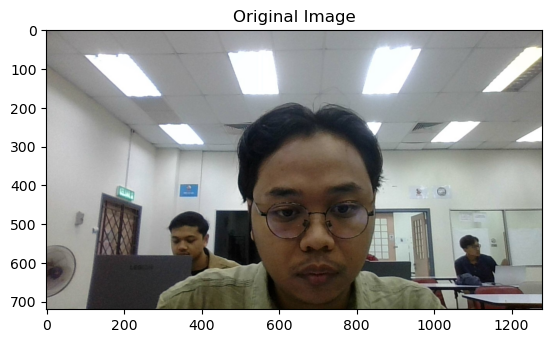

In [10]:
# Read the image
image = cv2.imread('img.jpg')

if image is None:
    raise ValueError("Could not read the image. Please check if 'img.jpg' exists.")

print("Image shape:", image.shape)

# Convert from BGR (OpenCV default) to RGB (for Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display with matplotlib
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("on")
plt.show()

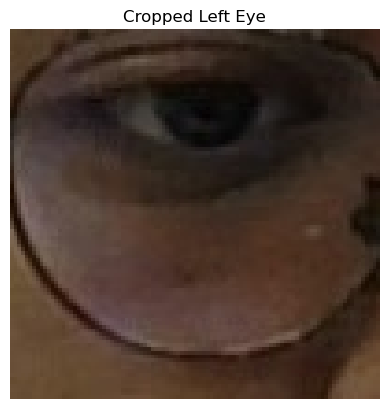

In [36]:
left_eye = image[450:550, 570:670] #type: ignore

left_eye_rgb = cv2.cvtColor(left_eye, cv2.COLOR_BGR2RGB)

plt.imshow(left_eye_rgb)
plt.title("Cropped Left Eye")
plt.axis("off")
plt.show()

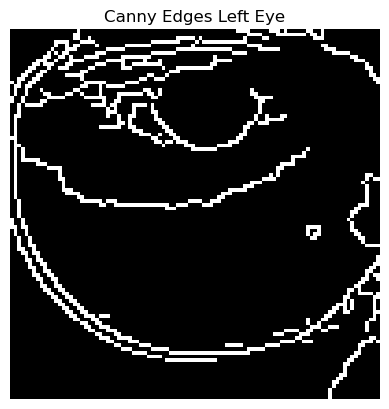

In [55]:
# Convert to grayscale (Canny works on single-channel images)
gray_eye = cv2.cvtColor(left_eye, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_eye, threshold1=30, threshold2=100, apertureSize=3, L2gradient=True)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edges Left Eye")
plt.axis("off")
plt.show()


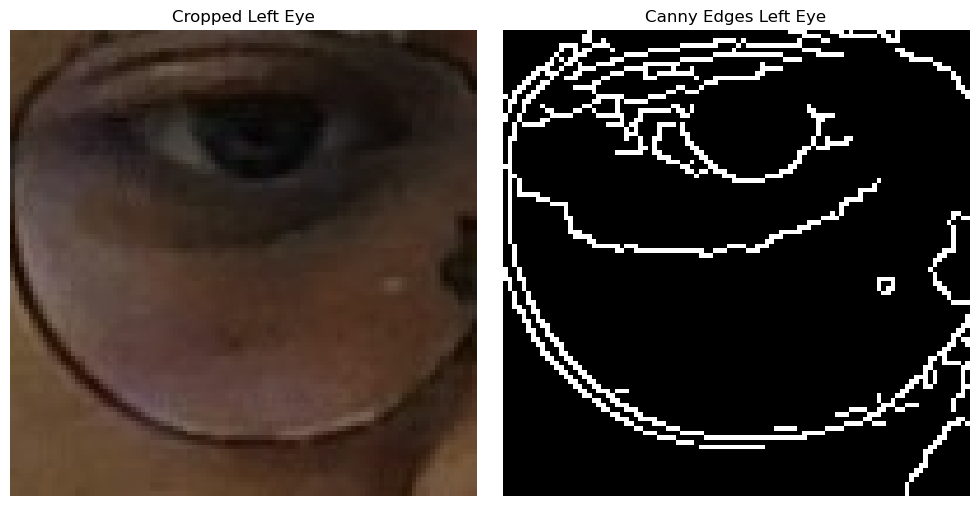

In [54]:
# Display side by side
plt.figure(figsize=(10, 5))

# Original eye crop
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(left_eye, cv2.COLOR_BGR2RGB))
plt.title("Cropped Left Eye")
plt.axis("off")

# Canny edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges Left Eye")
plt.axis("off")

plt.tight_layout()
plt.show()

In [49]:
# Convert the Canny edges from grayscale to 3-channel BGR so they can be blended with the color image
edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Blend the edges with the left eye crop to make edges visible
eye_with_edges = cv2.addWeighted(left_eye, 0.8, edges_colored, 0.8, 0)

# Create a copy of the original image to preserve it
image_with_edges = image.copy()  # type: ignore

# Replace the left eye region in the original image with the edge-enhanced eye
image_with_edges[450:550, 570:670] = eye_with_edges

# # Display the result
# plt.figure(figsize=(10, 8))
# plt.imshow(cv2.cvtColor(image_with_edges, cv2.COLOR_BGR2RGB))
# plt.title("Full Face with Eye Edges")
# plt.axis("off")
# plt.show()

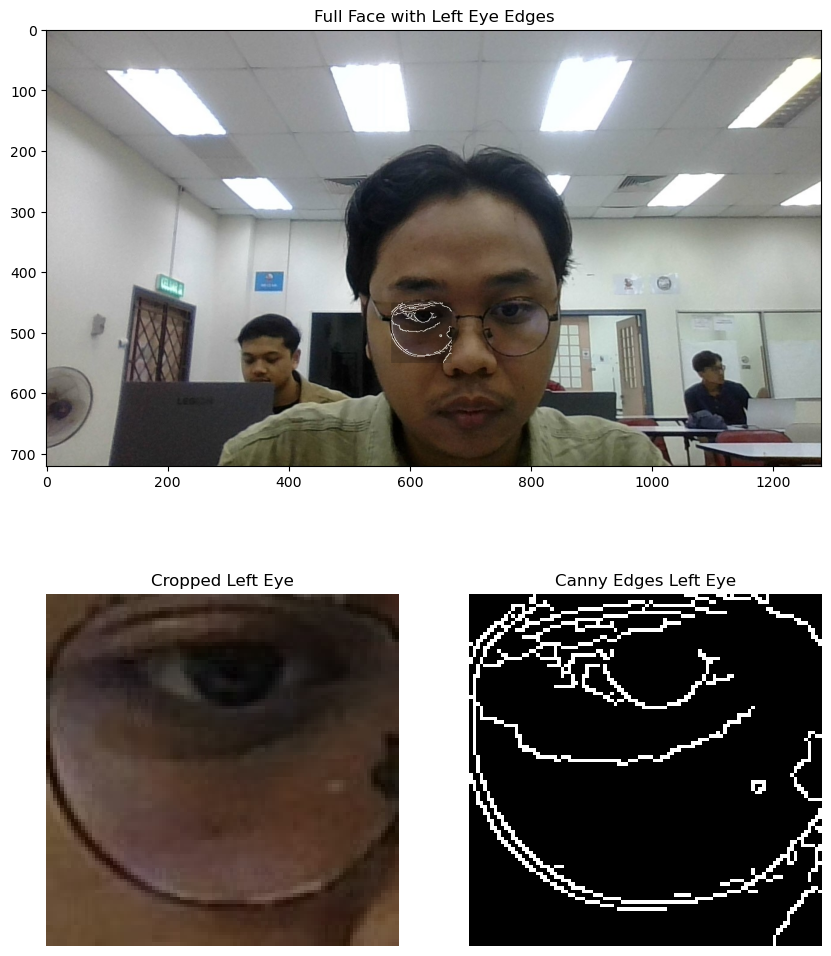

In [56]:
plt.figure(figsize=(10, 12))
gs = GridSpec(2, 2, height_ratios=[1.2, 1], width_ratios=[1, 1], hspace=0.3)

# Top: full face with edge-enhanced left eye (span both columns)
ax1 = plt.subplot(gs[0, :])
ax1.imshow(cv2.cvtColor(image_with_edges, cv2.COLOR_BGR2RGB))
ax1.set_title("Full Face with Left Eye Edges")
ax1.axis("on")

# Bottom left: original left eye crop
ax2 = plt.subplot(gs[1, 0])
ax2.imshow(cv2.cvtColor(left_eye, cv2.COLOR_BGR2RGB))
ax2.set_title("Cropped Left Eye")
ax2.axis("off")

# Bottom right: Canny edges of left eye
ax3 = plt.subplot(gs[1, 1])
ax3.imshow(edges, cmap='gray')
ax3.set_title("Canny Edges Left Eye")
ax3.axis("off")

plt.show()